# Capstone Design Project: Predicting if a Reddit Meme is a Good or  Bad Meme

David M. Arnold<br> 
Orion99DA@gmail.com<br>
BrainStation Data Science Candidate<br>
Winter Cohort 2021<br>

**Workbook #4 - Convolutional Neural Networks and Image Classification<br>**

This project is based on a dataset of collected Reddit memes that is shared on Kaggle.com.  Memes play an important role in social media platforms like Facebook, Twitter, Reddit and 4Chan and are shared by all types of users. I wanted to explore this data to determine if Machine Learning algorithms and Image Classification models could accurate predict what memes were actually popular in the Reddit social media platform, based on the amount of up votes and down votes each of these memes received.

While this project is meant to be a technical study of what factors may or may not contribute to a meme's popularity on Reddit, there are user names, comments and even the memes themselves that people reviewing this project may find vulgar and offensive.  

Please note that this project will be divided into several workbooks that will review and clean the data, transform the data into usable forms, perform the machine learning process on the data and perform image classification on the meme images.

**Workbook Overview**

This workbook will focus solely on the meme image data rather than the tabular/numerical data that was the focus of the prior workbooks.  The images have been segregated into two folders, "Good" memes and "Bad" memes based upon their upvote score, so if the meme had more than 24,000 upvotes it was classified as a "Good" meme, below 24,000 votes and it was classified as a "Bad" meme.

The neural network model was setup with a pre-trained image classification model and the last three layers are the only layers that will be trained to the meme training and validation data.  Once the model is trained, the accuracy results will be scored.  

The trained models will be tested on several memes randomly chosen from the "Good" and "Bad" memes folders to see if the model will accurately predict these images as good or bad.  In addition, I will select a few more recent memes from the Internet that were not part of the memes of the project just to see how the model will predict this memes as well.


### 4.1 Loading Necessary Libraries

In [1]:
# Mathematical and Statistical libraries
import pandas as pd
import numpy as np

# Visualization/Plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline

# Tensorflow libraries for Image Analysis
import tensorflow as tf
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Model, Sequential


# This package lets us import a single image at a time. It's built into matplotlib
import matplotlib.image as mpimg
from IPython.display import Image

# Package allowing us to resize an image (jpg/png for example)
import cv2

### 4.2 Transfer Learning with a Convolutional Neural Network (CNN)

We will use a process called Transfer Learning with a CNN.  This is will take a neural network model that has been trained on millions of images for identification and classification of those images.  The model chosen is called "VGG16" and has an image classification accuracy over 92%.  

While these models are typically used to test if an image is of a person or a dog or a train, the aim of this project to look at our existing images that are broken into two classifications, "good meme" vs "not a good meme".  This is the challenging part because there a variety of types of images in both categories.  There are images of people, animals, food, places, captions, etc.  

So with that in mind, the model will be trained on our collection of good and bad memes and see if it can determine what relationships there are in the images that lead to users either scoring the images good or not good.  

There is more background information on the VGG16 pre-trained neural network model: 
https://neurohive.io/en/popular-networks/vgg16/

#### 4.2.1 The Transfer Learning Process

The process of using the pre-trained model for our image classification process will follow this workflow:

- Choose the pre-trained CNN model (VGG16)
- Use all the layers of the CNN except for the last 3 layers
- Incorporate new layers that we choose from out data and add those to the end of the CNN
- The pre-trained layers are held static and not re-trained
- Train the CNN on only the create layers of our data


<img src="https://neurohive.io/wp-content/uploads/2018/11/vgg16-1-e1542731207177.png" width=400>

This is a visual representation of how the neural network will use the layers. The 3 blue rectangular bars on the right side of the image are the three layers that are being added and trained from our database of good and bad memes.  This is what the model will learn from in order to determine if it can accurate predict what is a good or bad meme.  All the other layers to the left of these three layers are the pre-trained layers of the CNN and will be held static.


#### 4.2.2 Loading the Images

We are establishing a path to our training images.  The that program uses is "memes/training/good" or "memes/training/bad".    

In [2]:
# This assigns a path to the two folders of "good memes" and "bad memes" in their respective folders

path = 'memes/'

#### 4.2.3 Establishing the Variables for the CNN

This will tell the CNN specifics for this classification case.   We have two classes of images, we want the program to size them to 64 x 64 pixels, use 3 channels or layers and feed them into the model in batch sizes of 20 images at time.

In [3]:
# These variables will be used in image classification process

# Classes is the types of classes of images that will be used, there are two
classes = 2

# Resizing the images resolution down to save computation time.  The value is the width and the height. 
pixels = 64

# The number of color channels or "layers" of the images
channels = 3

# The batch size of images that will be introduced to the model at a time
batch_size = 20

#### 4.2.4 Image Augmentation

This section will instruct the model to not only view this images to learn from them, the model will look at the image from different angles, zooms and distortions.  Think of it looking at an elephant only once from behind.  All you know is the elephant from behind.  Instead if you looked at an elephant from the front, sides, from down looking up and up looking down at the elephant, then you will know what an elephant looks like from all sides.  This is essentially what the training model is telling the image generator to do.

In [4]:
# Instantiate the model
# The commands or options here flip the images, zoom and shear the image and show it to the model to 
# allow it to see the image from different perspectives as it learns, instead of just seeing the images from head on

image_train = ImageDataGenerator(rescale=1./255,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   zoom_range=0.1,
                                   shear_range=0.2,
                                   fill_mode='reflect',
                                   validation_split=0.05)

This is telling the model to establish a path to both the training and validation image sets.  We have 3,066 images that are for training the model and there are two classes, good and bad.  We also have 160 validation images belonging to two classes.

In [5]:
# Training images 
training_set = image_train.flow_from_directory(path+'training/',
                                                    target_size=(pixels, pixels),
                                                    color_mode="rgb",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True, subset='training')



# Validation images 
validation_set = image_train.flow_from_directory(path+'training/',
                                                    target_size=(pixels, pixels),
                                                    color_mode="rgb",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False, subset='validation')

Found 3066 images belonging to 2 classes.
Found 160 images belonging to 2 classes.


#### 4.2.5 Setting Up the Model 

The Training dataset will shuffle the images being introduced to the model, this will help from overfitting the data.  The validation data will not be shuffled when being introduced to the model.

In [6]:
# Establishing the step size for the training set
# Total training images / batch size
train_stepsize = training_set.samples//training_set.batch_size 


# Establishing the step size for the validation set
# Total training images / batch size
valid_stepsize = validation_set.samples//validation_set.batch_size 

# Check the step size
print(f'Training step size = {train_stepsize} \nValidation step size = {valid_stepsize}')

Training step size = 153 
Validation step size = 8


This is just checking our step size between the Training data and the Validation data.  

In [7]:
# Setting up the Pre-trained image classification model

pretrained = VGG16(weights='imagenet', include_top=False, pooling='max', input_shape=(pixels,pixels,channels))

In [8]:
# Setting pretrained layers to "false" so that these are not trained in our model

for layer in pretrained.layers:
    layer.trainable=False

Earlier we saw a visual representation of the VGG16 model.  This is what the model structure looks like as a program.

In [9]:
# VGG16 CNN Model structure

pretrained.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0     

As you can see that the pre-trained VGG16 model has 20 layers and over 14 million parameters already built into it, rather than having to build a model and train all these parameters ourselves.   All we need to do is hold these parameters static in the training process so that only our 3 layers get trained by the model.

The dense layers of the training model are using "relu" activation functions used by the neural network to learn new data.  In addition, the output layer is using the "softmax" activation function.  This is used for multi-class classification in neural networks.

Here is an article that explains more in depth about the various activation functions that can be used with neural networks: https://medium.com/@cmukesh8688/activation-functions-sigmoid-tanh-relu-leaky-relu-softmax-50d3778dcea5

In [10]:
# Instantiated the model 
memes_model = Sequential()

# Adding the pretrained layers from VGG16 to the model 
memes_model.add(pretrained)

# Adding the dense layers to be trained by the model.
memes_model.add(Dense(256, activation='relu'))
memes_model.add(Dropout(0.2))
memes_model.add(Dense(512, activation='relu'))

# This is the output layer of the model.
memes_model.add(Dense(classes, activation='softmax'))

Early Stopping will allow the model to not continue to keep training or learning from the data if it starts to see too great of a drop in accuracy.  

In [11]:
# Initiate early stop based on validation accuracy
Early_stopping = EarlyStopping(monitor='val_acc', patience=6, mode='auto', min_delta=0.0001, verbose=1)

This cell will establish the learning rate of the model.  Which is the rate that the neural network learns from the data.  If this rate is set too high, the model will learn quickly but may skip over important details in the data and settle on a less optimal performance.  Conversely if the learning rate is set too low, the model stops learning all together.  

https://machinelearningmastery.com/understand-the-dynamics-of-learning-rate-on-deep-learning-neural-networks/

The loss function being used is 'categorical_crossentropy' which for when the model multiple classifications of images. There is an explanation here on how this loss function works:  https://peltarion.com/knowledge-center/documentation/modeling-view/build-an-ai-model/loss-functions/categorical-crossentropy



In [12]:
# Istantiating Adam optimizer with a learning rate of 0.0001 and saving to variable 'optim'
optim = Adam(lr=0.0001)

# Compiling the CNN model with the Optimizer, Loss and Metrics
memes_model.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['acc'])

# Summary 
memes_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 512)               14714688  
_________________________________________________________________
dense (Dense)                (None, 256)               131328    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 1026      
Total params: 14,978,626
Trainable params: 263,938
Non-trainable params: 14,714,688
_________________________________________________________________


Now we have a listing of our Non-trainable parameters that we have set to static or fixed, these are from the pre-trained model.  We also have established our trainable parameters for our model.   Well will epochs or iterations of training on the training images and the validation images.  Additionally we have told the program to use early stop if there is a loss in accuracy learned from epoch to epoch.

#### 4.2.6 Training and Scoring the Model

In [13]:
# Fitting the model to the training data
history = memes_model.fit_generator(generator=training_set,
                                steps_per_epoch=train_stepsize,
                                epochs=20,
                                validation_data=validation_set,
                                validation_steps=valid_stepsize,
                                callbacks=[Early_stopping])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
153/153 [==============================] - 32s 206ms/step - loss: 0.6981 - acc: 0.5391 - val_loss: 0.6334 - val_acc: 0.7312
Epoch 2/20
153/153 [==============================] - 37s 242ms/step - loss: 0.6842 - acc: 0.5598 - val_loss: 0.6223 - val_acc: 0.7125
Epoch 3/20
153/153 [==============================] - 38s 249ms/step - loss: 0.6767 - acc: 0.5758 - val_loss: 0.6046 - val_acc: 0.7188
Epoch 4/20
153/153 [==============================] - 41s 270ms/step - loss: 0.6704 - acc: 0.5873 - val_loss: 0.6023 - val_acc: 0.6938
Epoch 5/20
153/153 [==============================] - 47s 306ms/step - loss: 0.6675 - acc: 0.5932 - val_loss: 0.6457 - val_acc: 0.5750
Epoch 6/20
153/153 [==============================] - 49s 317ms/step - loss: 0.6666 - acc: 0.5896 - val_loss: 0.6099 - val_acc: 0.7500
Epoch 7/20
153/153 [==============================] - 47s 310ms/step - loss: 0.6621 - acc: 0.5982 - val_loss: 0.60

Now that the model has been trained we can observe the loss function and the accuracy on both the training and validation sets.

We have the accuracy score for both the training and validation data after each epoch or iteration.  The model will keep achieving higher and higher accuracy after each epoch or the early stop command will stop the modeling process.

In [14]:
# The model Loss and Accuracy history for the Training and Validation dataset

history.history

{'loss': [0.6981101036071777,
  0.6841548085212708,
  0.6767485737800598,
  0.6704027056694031,
  0.6675162315368652,
  0.6665590405464172,
  0.6620776057243347,
  0.6547160744667053,
  0.6481620073318481,
  0.6462910175323486,
  0.6437507271766663,
  0.64225834608078,
  0.6323972344398499,
  0.6289238333702087,
  0.6313483119010925],
 'acc': [0.5390676259994507,
  0.559750497341156,
  0.5758371353149414,
  0.5873276591300964,
  0.593237042427063,
  0.5896257162094116,
  0.598161518573761,
  0.6086670756340027,
  0.6188443899154663,
  0.6178594827651978,
  0.6227839589118958,
  0.6237688660621643,
  0.6326329708099365,
  0.6375574469566345,
  0.6342744827270508],
 'val_loss': [0.6333925724029541,
  0.6223467588424683,
  0.6046428680419922,
  0.6022511720657349,
  0.645745575428009,
  0.6099380254745483,
  0.6054753065109253,
  0.5960906744003296,
  0.5926080942153931,
  0.6123421788215637,
  0.6212394833564758,
  0.5920997858047485,
  0.5881401896476746,
  0.607547402381897,
  0.594378

This is showing the loss and accuracy scores for both the training and validation data.  The loss typically decreases after each epoch while the accuracy typically increases after each epoch.

#### 4.2.7 Visualize the Model

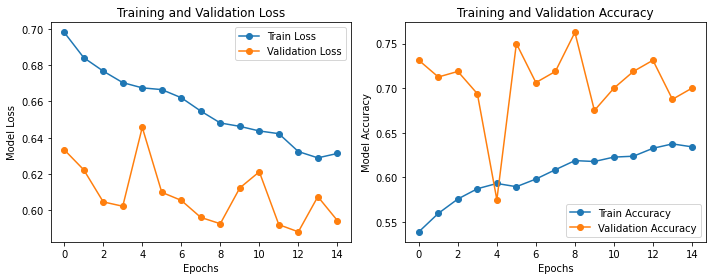

In [15]:
plt.subplots(1,2,figsize =(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], marker='o', label='Train Loss')
plt.plot(history.history['val_loss'], marker='o', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('Model Loss')

plt.subplot(1,2,2)
plt.plot(history.history['acc'], marker='o', label='Train Accuracy')
plt.plot(history.history['val_acc'], marker='o', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('Model Accuracy')

plt.tight_layout()
plt.show()

We can see that the Loss or "error" continued to decrease for each set of data.  Additionally the accuracy increased and leveled off before the model stopped.  

While these results look somewhat promising, I would like to test the model on images that use a larger pixel area and see if the accuracy scores increase at all.  As I discussed earlier, the VGG16 trained image model has an accuracy score over 92% accuracy in classifying images.  The major exception is that the model is mainly used for looking at certain images and classifying the image.  So if you show the model an image of a slice of pizza, 92% of the time it will classify the image as a slice of pizza.

What we're trying to do is feed the model images that people either scored as a good meme or a bad meme and expecting the image to learn enough about those images to tell is "I think this image is a good meme".  Which is difficult because you're relying on group of completely random strangers on Reddit and their opinions on cat memes and political memes.  So the fact that the model achieved ~60% accuracy, that's really interesting.  

In an attempt to increase the accuracy, I tried several values for the learning rate for the Adam optimizer. I tried 0.5, 0.1, 0.01 and eventually settled on 0.0001.  I also tried another optimizer, SGD and did not seem to improve accuracy at all, it leveled off at ~50%.  

I also tried dropout rates of 0.5 and 0.2.  The 0.2 dropout rate seemed to slightly increase the accuracy scores of both the training and validation data.

So let us run another test using images at 128 pixels rather than 64 pixels and see if that has any major impact on the model accuracy.

#### 4.2.8 Second CNN Model with Higher Resolution Images

This section will repeat the CNN training and validation process using 128 x 128 pixel images rather than 64 x 64 pixel images from the previous section.  I wanted to train a model using higher image resolution to determine if the increase in resolution would result in higher training and validation accuracy scores.

In [16]:
# These variables will be used in image classification process

# Classes is the types of classes of images that will be used, there are two
classes = 2

# Resizing the images resolution down to save computation time.  The value is the width and the height. 
pixels = 128

# The number of color channels or "layers" of the images
channels = 3

# The batch size of images that will be introduced to the model at a time
batch_size = 20

In [17]:
# Instantiate the model
# The commands or options here flip the images, zoom and shear the image and show it to the model to 
# allow it to see the image from different perspectives as it learns, instead of just seeing the images from head on

image_train2 = ImageDataGenerator(rescale=1./255,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   zoom_range=0.1,
                                   shear_range=0.2,
                                   fill_mode='reflect',
                                   validation_split=0.15)

In [18]:
# Training images 
training_set2 = image_train.flow_from_directory(path+'training/',
                                                    target_size=(pixels, pixels),
                                                    color_mode="rgb",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True, subset='training')



# Validation images 
validation_set2 = image_train.flow_from_directory(path+'training/',
                                                    target_size=(pixels, pixels),
                                                    color_mode="rgb",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False, subset='validation')

Found 3066 images belonging to 2 classes.
Found 160 images belonging to 2 classes.


In [19]:
# Establishing the step size for the training set
# Total training images / batch size
train_stepsize2 = training_set2.samples//training_set2.batch_size 


# Establishing the step size for the validation set
# Total training images / batch size
valid_stepsize2 = validation_set2.samples//validation_set2.batch_size 

# Check the step sizes
print(f'Training step size = {train_stepsize2} \nValidation step size = {valid_stepsize2}')

Training step size = 153 
Validation step size = 8


In [20]:
# Pre-trained GG16 network

pretrained = VGG16(weights='imagenet', include_top=False, pooling='max', input_shape=(pixels,pixels,channels))

In [21]:
# 2.  Setting all layers to not trainable so weights wont be tweaked
for layer in pretrained.layers:
    layer.trainable=False

In [22]:
# Instantiated the model 
memes_model2 = Sequential()

# Adding the pretrained layers from VGG16 to the model 
memes_model2.add(pretrained)

# Adding the dense layers to be trained by the model.
memes_model2.add(Dense(256, activation='relu'))
memes_model2.add(Dropout(0.2))
memes_model2.add(Dense(512, activation='relu'))

# This is the output layer of the model.
memes_model2.add(Dense(classes, activation='softmax'))

In [23]:
# Initiate early stop based on validation accuracy
Early_stopping = EarlyStopping(monitor='val_acc', patience=5, mode='auto', min_delta=0.0001, verbose=1)

In [24]:
# Istantiating Adam optimizer with a learning rate of 0.0001 and saving to variable 'optim'
optim = Adam(lr=0.0001)

# Compiling the CNN model 
memes_model2.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['acc'])

# Summary 
memes_model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 512)               14714688  
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 1026      
Total params: 14,978,626
Trainable params: 263,938
Non-trainable params: 14,714,688
_________________________________________________________________


In [25]:
# Fitting the model to the training data
history2 = memes_model2.fit_generator(generator=training_set2,
                                steps_per_epoch=train_stepsize2,
                                epochs=100,
                                validation_data=validation_set2,
                                validation_steps=valid_stepsize2,
                                callbacks=[Early_stopping])

Epoch 1/100
153/153 [==============================] - 176s 1s/step - loss: 0.7079 - acc: 0.5289 - val_loss: 0.6221 - val_acc: 0.7125
Epoch 2/100
153/153 [==============================] - 177s 1s/step - loss: 0.6854 - acc: 0.5578 - val_loss: 0.6064 - val_acc: 0.6938
Epoch 3/100
153/153 [==============================] - 172s 1s/step - loss: 0.6801 - acc: 0.5706 - val_loss: 0.6083 - val_acc: 0.7312
Epoch 4/100
153/153 [==============================] - 173s 1s/step - loss: 0.6743 - acc: 0.5755 - val_loss: 0.6138 - val_acc: 0.7188
Epoch 5/100
153/153 [==============================] - 177s 1s/step - loss: 0.6689 - acc: 0.5847 - val_loss: 0.5985 - val_acc: 0.7375
Epoch 6/100
153/153 [==============================] - 181s 1s/step - loss: 0.6630 - acc: 0.5978 - val_loss: 0.5862 - val_acc: 0.7437
Epoch 7/100
153/153 [==============================] - 177s 1s/step - loss: 0.6574 - acc: 0.6126 - val_loss: 0.5885 - val_acc: 0.7188
Epoch 8/100
153/153 [==============================] - 178s 1s

In [26]:
# The model Loss and Accuracy history for the Training and Validation dataset

history2.history

{'loss': [0.7079042792320251,
  0.6854308843612671,
  0.6801174283027649,
  0.6742638349533081,
  0.6689091920852661,
  0.6630394458770752,
  0.6574282050132751,
  0.6584160923957825,
  0.6492330431938171,
  0.648201048374176,
  0.6450674533843994,
  0.6434792876243591,
  0.6399739384651184],
 'acc': [0.5288903713226318,
  0.5577806830406189,
  0.5705843567848206,
  0.5755088925361633,
  0.5847012400627136,
  0.5978332161903381,
  0.6126067042350769,
  0.5978332161903381,
  0.6152330636978149,
  0.6240971684455872,
  0.6188443899154663,
  0.617202877998352,
  0.6326329708099365],
 'val_loss': [0.6221181750297546,
  0.6063882112503052,
  0.6082521677017212,
  0.6137615442276001,
  0.5984566807746887,
  0.5861893892288208,
  0.5884755849838257,
  0.5892099142074585,
  0.5802772641181946,
  0.5778878927230835,
  0.6071515679359436,
  0.5898625254631042,
  0.6158460974693298],
 'val_acc': [0.7124999761581421,
  0.6937500238418579,
  0.731249988079071,
  0.71875,
  0.737500011920929,
  0.74

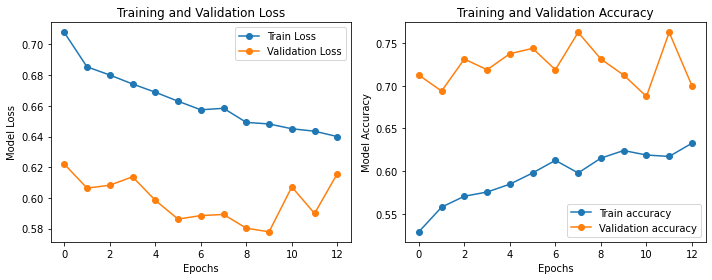

In [27]:
plt.subplots(1,2,figsize =(10,4))

plt.subplot(1,2,1)
plt.plot(history2.history['loss'], marker='o', label='Train Loss')
plt.plot(history2.history['val_loss'], marker='o', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('Model Loss')

plt.subplot(1,2,2)
plt.plot(history2.history['acc'], marker='o', label='Train accuracy')
plt.plot(history2.history['val_acc'], marker='o', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('Model Accuracy')

plt.tight_layout()
plt.show()

We can see that the model was able to run through 13 epochs of training and validation data before the early stopping command ended the training of the model.  The accuracy results were similar to the 64 pixel model, the accuracy on the training data was ~64% and the validation data was ~70% accurate.  

The validation data loss and accuracy values seemed to bounce around rather than following a smooth trend.  This could be indicative of not having a large enough dataset.   

Also, each model the training dataset accuracy is lower than the validation dataset.  This is due to setting the drop-out rate.  This allows the model to keep from overfitting to the data.  

### 4.3 Classification Predictions

Now that the model has been trained, we can use it to predict if it can accurately predict a few images that are from the Good and the Bad meme folders.  I will select 5 images from the "Good" meme folder and 5 images from the "Bad" meme folder and see if they trained model predicts if they will be a Good or a Bad meme.

I tried using both the 64 pixel trained memes_model and the 128 pixel trained memes_model2 on these images.  The 64 trained model actually has better results, although is does inaccurately predict several images.  The memes_model2 128 pixel model seemed to have developed a bias towards images that had people in them and scored them all as "Good" memes regardless if they were actually a "Good" meme or a "Bad" meme.  So I will only use the 64 pixel trained model for this portion of predicting if a meme is a "Good" meme or a "Bad" meme.

#### 4.3.1 Predicting a Good Meme

These are some images selected from the "Good" memes folder to see how the trained model predicts if they are classified as a "Good" meme or a "Bad" meme.

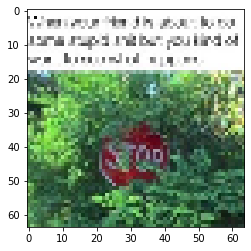

In [112]:
# Load the image path:
good1 = mpimg.imread('memes/training/good/770g4h.jpg')

# Reside the image
res_good1 = cv2.resize(good1, dsize=(64, 64), interpolation=cv2.INTER_CUBIC)

# Display the image
good_plot1 = plt.imshow(res_good1)

We have to transform the image into an array.

In [113]:
# Transform the image into an array
pred_good1 = tf.keras.preprocessing.image.img_to_array(
    res_good1, data_format=None, dtype=None
)

# Use the trained model
memes_model.predict(pred_good1.reshape(1,64,64,3)) 

array([[7.2139215e-07, 9.9999928e-01]], dtype=float32)

The model accurately predicts that is meme is a "Good" meme.

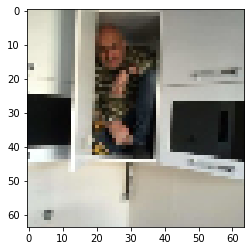

In [114]:
# Load the image path:
good2 = mpimg.imread('memes/training/good/5h29b2.jpg')

# Reside the image
res_good2 = cv2.resize(good2, dsize=(64, 64), interpolation=cv2.INTER_CUBIC)

# Display the image
good_plot2 = plt.imshow(res_good2)

We have to transform the image into an array.

In [115]:
# Transform the image into an array
pred_good2 = tf.keras.preprocessing.image.img_to_array(
    res_good2, data_format=None, dtype=None
)

# Use the trained model
memes_model.predict(pred_good2.reshape(1,64,64,3)) 

array([[1.0000000e+00, 4.5147126e-11]], dtype=float32)

The model incorrectly predicts that this is a "Bad" meme.

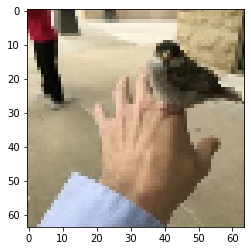

In [116]:
# Load the image path:
good3 = mpimg.imread('memes/training/good/6cx554.jpg')

# Reside the image
res_good3 = cv2.resize(good3, dsize=(64, 64), interpolation=cv2.INTER_CUBIC)

# Display the image
good_plot3 = plt.imshow(res_good3)

We have to transform the image into an array.

In [117]:
# Transform the image into an array
pred_good3 = tf.keras.preprocessing.image.img_to_array(
    res_good3, data_format=None, dtype=None
)

# Use the trained model
memes_model.predict(pred_good3.reshape(1,64,64,3)) 

array([[5.6694027e-09, 1.0000000e+00]], dtype=float32)

The model correctly predicts that this is a "Good" meme.

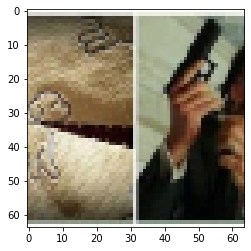

In [118]:
# Load the image path:
good4 = mpimg.imread('memes/training/good/7qzz1u.jpg')

# Reside the image
res_good4 = cv2.resize(good4, dsize=(64, 64), interpolation=cv2.INTER_CUBIC)

# Display the image
good_plot4 = plt.imshow(res_good4)

We have to transform the image into an array.

In [119]:
# Transform the image into an array
pred_good4 = tf.keras.preprocessing.image.img_to_array(
    res_good4, data_format=None, dtype=None
)

# Use the trained model
memes_model.predict(pred_good4.reshape(1,64,64,3)) 

array([[9.9999988e-01, 1.2911968e-07]], dtype=float32)

The model incorrectly predicts that this is a "Bad" meme.

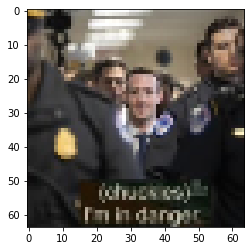

In [120]:
# Load the image path:
good5 = mpimg.imread('memes/training/good/8bd7cl.jpg')

# Reside the image
res_good5 = cv2.resize(good5, dsize=(64, 64), interpolation=cv2.INTER_CUBIC)

# Display the image
good_plot5 = plt.imshow(res_good5)

We have to transform the image into an array.

In [121]:
# Transform the image into an array
pred_good5 = tf.keras.preprocessing.image.img_to_array(
    res_good5, data_format=None, dtype=None
)

# Use the trained model
memes_model.predict(pred_good5.reshape(1,64,64,3)) 

array([[1.000000e+00, 5.010337e-12]], dtype=float32)

The model incorrectly predicts that this is a "Bad" meme.

Overall the 64 pixel model only correctly predicted 2 out of the 5 images that were randomly sampled from the "Good" memes folder.  I used the 128 pixel model on this set as well and it correctly predicted 4 out of 5 images.  While I would like to use this model, it predicted all 5 of the "Bad" memes as "Good" memes.  


#### 4.3.2 Predicting a Bad Meme

This image is from the "Bed" meme folder, let's test it on the trained model. 

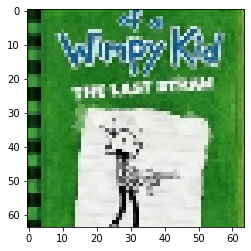

In [122]:
# Load the image path:
bad1 = mpimg.imread('memes/training/bad/84v6vx.jpg')

# Reside the image
res_bad1 = cv2.resize(bad1, dsize=(64, 64), interpolation=cv2.INTER_CUBIC)

# Display the image
bad_plot1 = plt.imshow(res_bad1)

We have to transform the image into an array.

In [123]:
# Transform the image into an array
pred_bad1 = tf.keras.preprocessing.image.img_to_array(
    res_bad1, data_format=None, dtype=None
)

# Use the trained model
memes_model.predict(pred_bad1.reshape(1,64,64,3)) 

array([[1.0000000e+00, 1.5714006e-11]], dtype=float32)

The model correctly predicts that this is a "Bad" meme.

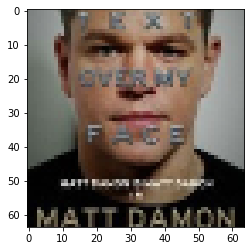

In [124]:
# Load the image path:
bad2 = mpimg.imread('memes/training/bad/628vmo.jpg')

# Reside the image
res_bad2 = cv2.resize(bad2, dsize=(64, 64), interpolation=cv2.INTER_CUBIC)

# Display the image
bad_plot2 = plt.imshow(res_bad2)

We have to transform the image into an array.

In [125]:
# Transform the image into an array
pred_bad2 = tf.keras.preprocessing.image.img_to_array(
    res_bad2, data_format=None, dtype=None
)

# Use the trained model
memes_model.predict(pred_bad2.reshape(1,64,64,3)) 

array([[9.9976474e-01, 2.3524390e-04]], dtype=float32)

The model correctly predicts that this is a "Bad" meme.

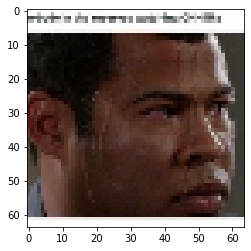

In [126]:
# Load the image path:
bad3 = mpimg.imread('memes/training/bad/649ejf.jpg')

# Reside the image
res_bad3 = cv2.resize(bad3, dsize=(64, 64), interpolation=cv2.INTER_CUBIC)

# Display the image
bad_plot3 = plt.imshow(res_bad3)

We have to transform the image into an array.

In [127]:
# Transform the image into an array
pred_bad3 = tf.keras.preprocessing.image.img_to_array(
    res_bad3, data_format=None, dtype=None
)

# Use the trained model
memes_model.predict(pred_bad3.reshape(1,64,64,3)) 

array([[1.0000000e+00, 6.0322166e-24]], dtype=float32)

The model correctly predicts that this is a "Bad" meme.

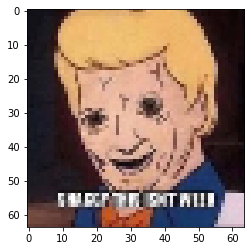

In [128]:
# Load the image path:
bad4 = mpimg.imread('memes/training/bad/62sqm9.jpg')

# Reside the image
res_bad4 = cv2.resize(bad4, dsize=(64, 64), interpolation=cv2.INTER_CUBIC)

# Display the image
bad_plot4 = plt.imshow(res_bad4)

We have to transform the image into an array.

In [129]:
# Transform the image into an array
pred_bad4 = tf.keras.preprocessing.image.img_to_array(
    res_bad4, data_format=None, dtype=None
)

# Use the trained model
memes_model.predict(pred_bad4.reshape(1,64,64,3)) 

array([[1.000000e+00, 2.116951e-23]], dtype=float32)

The model correctly predics that this is a "Bad" meme.

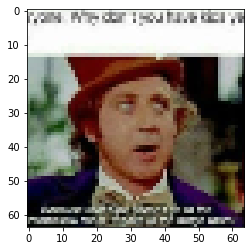

In [130]:
# Load the image path:
bad5 = mpimg.imread('memes/training/bad/7sht0r.jpg')

# Reside the image
res_bad5 = cv2.resize(bad5, dsize=(64, 64), interpolation=cv2.INTER_CUBIC)

# Display the image
bad_plot5 = plt.imshow(res_bad5)

We have to transform the image into an array.

In [131]:
# Transform the image into an array
pred_bad5 = tf.keras.preprocessing.image.img_to_array(
    res_bad5, data_format=None, dtype=None
)

# Use the trained model
memes_model.predict(pred_bad5.reshape(1,64,64,3)) 

array([[1.0000000e+00, 2.1492603e-18]], dtype=float32)

The model correctly predicts that this is a "Bad" meme.  

So the results are actually slightly better for the "Bad" meme prediction than the "Good" meme prediction.  As I mentioned before, the model trained on the 128 pixel contrast images was showing a predictive bias towards images that had people in them.  Regardless if they were "Good" or "Bad" memes, the model always classified them as "Good".

#### 4.3.3 Testing Predictions on New Image Files

Now that the we have tested the trained model on some images from the already existing images. Let's introduce a few images that were not in the meme dataset.

**Predicting "Thumbs Up Harold"**

Thumbs up Harold is a stock image of any older man doing things in a group of stock images.  One of the widely shared images is him with a hard hearted grin, giving the thumbs up.   Let's see what the prediction says.



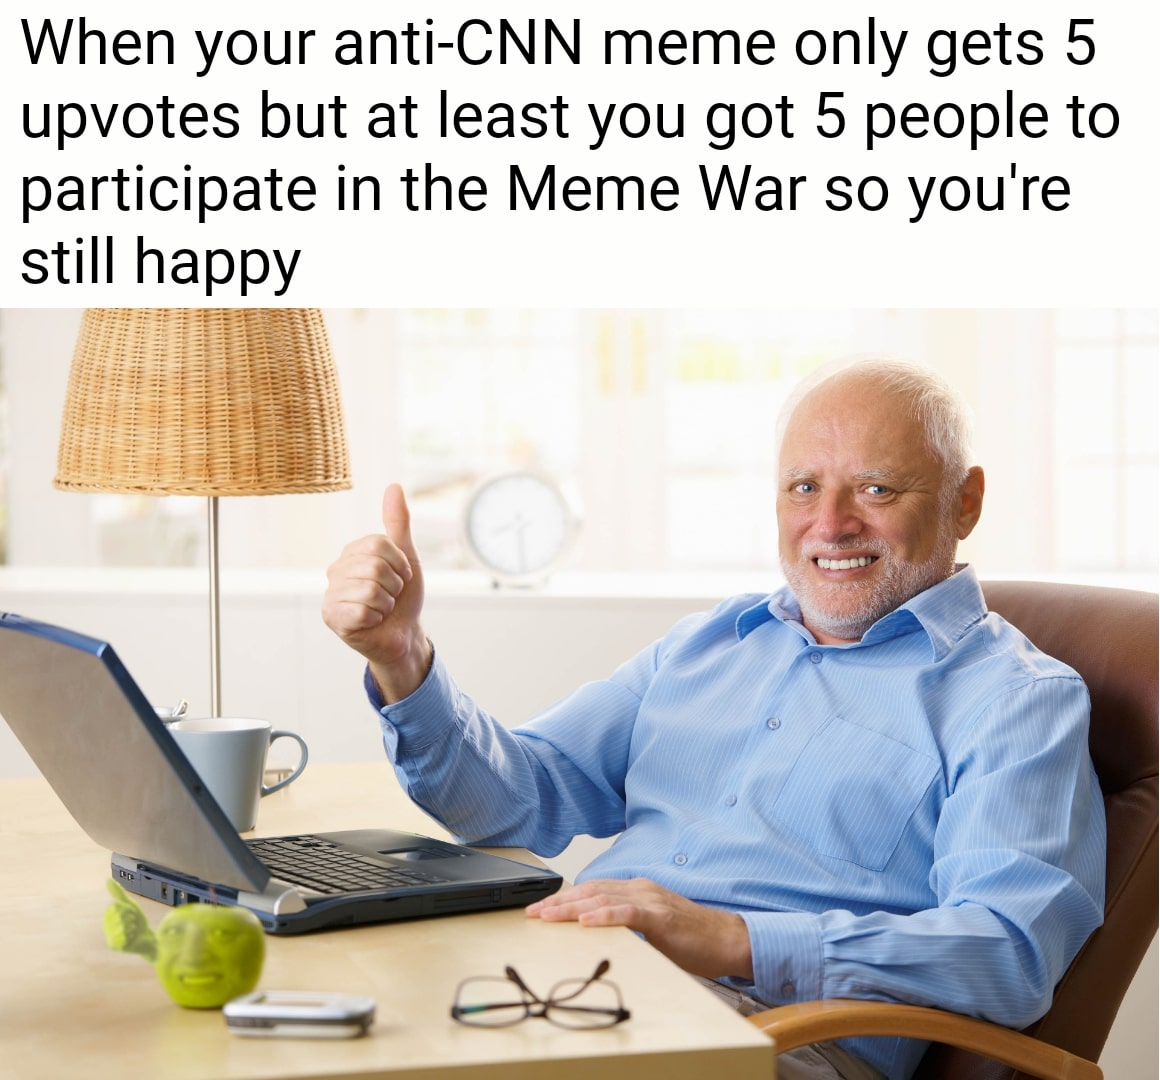

In [132]:
# Showing the image to be predicted

Image(filename = 'memes/bonus/thumbs.jpg', width = 200, height = 200)

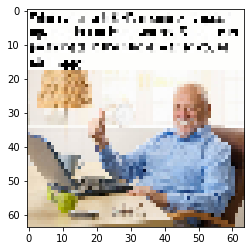

In [133]:
# Load the image path
thumbs1 = mpimg.imread('memes/bonus/thumbs.jpg')

# Resize the image 
res_thumbs = cv2.resize(thumbs1, dsize=(64, 64), interpolation=cv2.INTER_CUBIC)

# Display the image
thumbs_plot = plt.imshow(res_thumbs)

In [134]:
# Transform the image into an array
pred_thumbs = tf.keras.preprocessing.image.img_to_array(
    res_thumbs, data_format=None, dtype=None
)

# Predict the meme
memes_model.predict(pred_thumbs.reshape(1,64,64,3)) 

array([[0.96697325, 0.03302679]], dtype=float32)

It appears that the trained model has predicted that "Thumbs up Harold" is a "Bad" meme.  

**Predicting "Woman Screaming at Cat Meme**

This is another widely shared meme.  It is an image from one of the Reality Housewives tv shows screaming and pointing and someone added a confused looking cat on the opposite side of the image.  

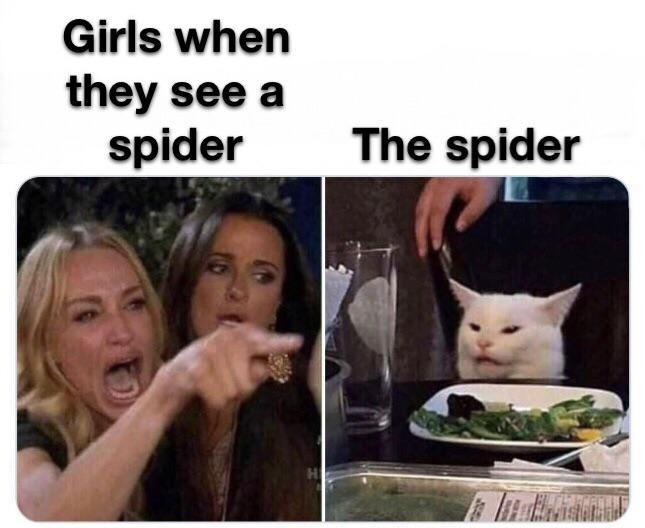

In [135]:
# Showing the image to be predicted

Image(filename = 'memes/bonus/yellingcat.jpg', width = 200, height = 200)

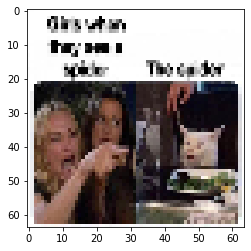

In [136]:
# Load the image path
yell_cat = mpimg.imread('memes/bonus/yellingcat.jpg')

# Resize the image 
res_cat = cv2.resize(yell_cat, dsize=(64, 64), interpolation=cv2.INTER_CUBIC)

# Display the image
cat_plot = plt.imshow(res_cat)

In [137]:
# Transform the image into an array
pred_cat = tf.keras.preprocessing.image.img_to_array(
    res_cat, data_format=None, dtype=None
)

# Predict the meme
memes_model.predict(pred_cat.reshape(1,64,64,3)) 

array([[1.8064218e-05, 9.9998188e-01]], dtype=float32)

Based on the prediction results, the lady yelling at the confused cat is predicted as a "Good" meme.

**Predicting "Quarantine Spongebob 2020**

I've never seen this meme or image before now, but it's a play on Spongebob under quarantine during the Covid-19 outbreak.  Let's see how the model scores this meme.

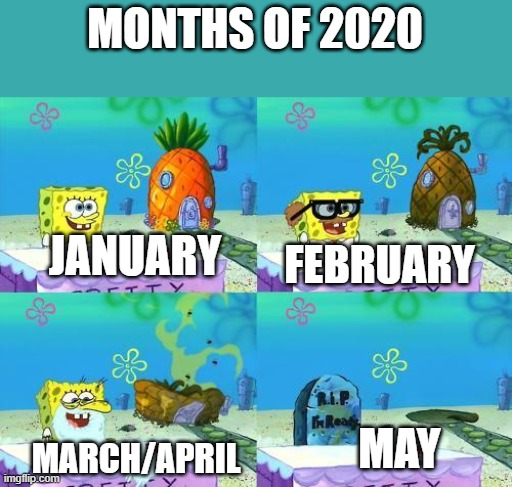

In [138]:
# Showing the image to be predicted

Image(filename = 'memes/bonus/spongebob2020.jpg', width = 200, height = 200)

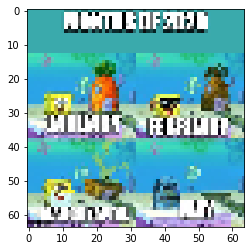

In [139]:
# Load the image path
spongebob = mpimg.imread('memes/bonus/spongebob2020.jpg')

# Resize the image 
res_bob = cv2.resize(spongebob, dsize=(64, 64), interpolation=cv2.INTER_CUBIC)

# Display the image
plot_bob = plt.imshow(res_bob)

In [140]:
# Transform the image into an array
pred_bob = tf.keras.preprocessing.image.img_to_array(
    res_bob, data_format=None, dtype=None
)

# Predict the meme
memes_model.predict(pred_bob.reshape(1,64,64,3)) 

array([[1.0000000e+00, 5.2536713e-09]], dtype=float32)

It appears that the model is has predicted that Spongebob in Quarantine is a "Bad" meme.

**Predicting "Joker 2020 Showing 2021 Pennywise Around the Office**

Here is a newer meme that I have also never seen before.  It is the Joker (2020) showing Pennywise the Clown from IT (2021) around the office. 

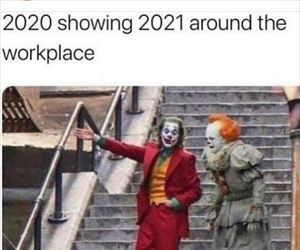

In [141]:
# Showing the image to be predicted

Image(filename = 'memes/bonus/jokerpennywise.jpg', width = 200, height = 200)

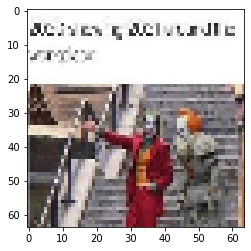

In [142]:
# Load the image path
joker_clown = mpimg.imread('memes/bonus/jokerpennywise.jpg')

# Resize the image 
res_joker = cv2.resize(joker_clown, dsize=(64, 64), interpolation=cv2.INTER_CUBIC)

# Display the image
joker_plot = plt.imshow(res_joker)

In [143]:
# Transform the image into an array
pred_joker = tf.keras.preprocessing.image.img_to_array(
    res_joker, data_format=None, dtype=None
)

# Predict the meme
memes_model.predict(pred_joker.reshape(1,64,64,3)) 

array([[1.0000000e+00, 3.1176843e-19]], dtype=float32)

The model as also predicted that the meme with the Joker and Pennywise the Clown as a "Bad" meme.  This is actually disappointing because of the rough year that 2020 was and the popularity of the Joker and IT movies with the younger meme crowd, I actually think this meme would score favorably. 

### 4.4 Image Classification Summary

This was a certainly an interesting experiment to use a categorical image classification to see if a pre-trained neural network model would accurately predict if a meme image was a popular meme on Reddit or not.  This type of study was different from the Machine Learning portion of this report.  The ML portion was looking at tabular data in each row of the datasets, determining if there were relationships between the amount of up-votes and the other data such as the posting data, the words contained in the title, the thumbnail image size and other features.  This was an attempt to expose and explain these relationships.  

This was purely going on the features within the images themselves and determining if all the images in the Good folder shared some sort of relationship with all the other images in the Good folder, and the same for the Bad memes folder as well.  Could the image classification model be able to find any relationship if there was any at all?  

I had previously stated that this was a unique challenge for the classifier model because normally what it is intended to do is look at a group of images and accurately predict: Is this an image of an owl?  Is this an image of an airplane?  Is this an image of a building?    We were using that same trained model to look at large set of images, grouped only into two categories:  Good Memes and Bad Memes, that's it.  We are training it to see if it can discover what people felt was funny or "upvote" worthy by people on a sub-Reddit board. With that being said, the accuracy reaching ~70-75% accurate is pretty impressive.

### 4.5 Project Summary

This concludes the project of "Using Machine Learning to Predict a Popular Meme on Reddit".   I want to thank you for taking the time for reviewing my work and I hope you have found it informative and also entertaining.  As I have mentioned that this dataset was aggregated from a group on Reddit and there is some material and user names in this project that are offensive and of a controversial nature. 

So why memes?  When I first started this project, I had several choices in topics for the project and I felt that I wanted to pursue something that I was most interest in.  Social Media and interacting with peers online is something I enjoy in my spare time, so naturally I chose the Reddit Memes dataset that I found on Kaggle.  

I feel that memes are important.  This is just a small set from a select group of people that like to utilize Reddit, but this is just a sub-sample of a much larger world.  Memes are part of everday life, anyone can make one and anyone can share them.  I honestly can't remember the last time I bought a newspaper, it was probably in an airport to pass the time.  This is just how my generation communicates, we live in an online world and sharing a meme can sometimes convey as much sentiment or opinion as sharing a link to an article or reading a newspaper.  

To recap the technical aspects of this project, I would like to revisit the steps we took together.   First we narrowed down our dataset and the purpose of the project.  Next week imported and reviewed the data to familiarize ourselves with what we were working with.  Very few features; date posted, title/description, user name, upvotes, downvotes (blank), links to the Reddit Post and some attributes relating to the thumbnail image that exists on the Reddit post.  In addition, there were only a couple thousand posts that were aggregated.  Which is challenging, because more data for the models, the more they can learn from the data and the relationships within.

To successfully predict our Target variable (upvotes), we transformed our features into numerical data, because that is what the machine learning algorithms require for training/learning.  The title column was reduced down to around 600 keywords and vectorized.  The thumbnail height and width were made into an area, which may or may not impact the upvotes.  The user names were binned or "grouped" into whether or not they had posted more than once.  And lastly the date posted column was split into several features: year, month, day of the week and weekend.  As previously discussed, we noticed that 2014-2015 posts where much less in volume, but had much higher upvotes.  Also that 2016-2018 there was a migration of suspended Twitter users that moved to Reddit to still get their social media fix.  So there was a lot more content and maybe there was just too much content for everyone to review, or maybe the quality of memes just went down.

The machine learning portion for the tabular data consisted of using three different ML models:  Logistic Regression, Decision Trees and K-Nearest Neighbors.  Each model has their own unique hyper-parameter that was fine tuned to the training data and tested on a validation set of data.  This allows us to make sure that the best possible ML model is presented to the test dataset.  The Logistic Regression model proved to be the most accurate for the test data, but the Decision Trees model was also very close.  The KNN or K-Nearest Neighbors scored slightly lower.  

The final phase in the project was to look at the images or the memes themselves to see if there was anything at all in these images that an algorithm could study and learn from in order to confidently say "yes, this is a good meme" or "no, I do not think this is a good meme."  And this is challenging, I did not actually feel that simply by looking at ~3000 images would an algorithm be able to more accurately predict a good meme than looking at the tabular data.  I believed that's where the answered lied, in the data.  The dates, the title, the user posting the meme, that is where the decision was made by thousands of other Reddit users that said "yes this post deserves my upvote".  And I was wrong. 

Using the CNN/Convolutional Neural Network and pre-trained image model VGG16, I was first able to achieve prediction accuracy between ~55-60% accuracy in predicting a "Good" and "Bad" meme.  Which isn't exactly high but it was asking the model to predict a preference, not predicting dogs vs cats in an image.  And then changing things such as the learning rate, drop-out rate, trying different optimizers, I was able to increase the accuracy to ~60-65%.  I tried 64 pixels, 128 pixels and 256 pixels.  These all scored similar in accuracy.  One last thing I tried was adjusting the training/validation split of the data.  Initially I was at 20% throughout the process.  Then I tried 30% and the accuracy went down.  Lastly I tried 10% and then 5% train/validation split.   It was when I went to 5% split, meaning the model is training on 95% of the images and validating on 5%, that the accuracy scores went up over 70% accuracy.  This was a considerable improvement from the earlier CNN results.